Course Project - Xiaohan Jiang - CS677

Convolutional Neural Network for Traffic Sign Image Classification

1. Download and Imports
2. Loading Dataset
3. Data Splitting and Conversion
4. Creating and Compiling the Model
5. Training the Model
6. Visualizing the Performance of the Model
7. Loading Test Dataset and Evaluating the Model



1. Download and Imports

In [1]:
# Fundamental classes
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

# For ploting
import matplotlib.pyplot as plt

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

2. Loading Dataset (Traffic Signs Images)

In [7]:
import zipfile
import os

# Path to the ZIP file
zip_file_path = "/content/archive.zip"
destination_folder = "/content/extracted_data"

# Check if the file is a valid ZIP
try:
    # Create destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # Extract ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_folder)
    print(f"Files extracted to '{destination_folder}'")
except zipfile.BadZipFile:
    print("Error: The file is not a valid ZIP file.")
except Exception as e:
    print(f"An error occurred: {e}")



Files extracted to '/content/extracted_data'


In [9]:
data = []
labels = []
classes = 43
extracted_path = "/content/extracted_data"

for i in range(classes):
    path = os.path.join('/content/extracted_data/archive','Train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image: {e}")

data = np.array(data)
labels = np.array(labels)


3. Data Splitting and conversion

In [10]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


4. Creating and Compiling the Model

In [11]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

5. Training the Model

In [12]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 15
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 126s 126ms/step - accuracy: 0.2573 - loss: 3.3486 - val_accuracy: 0.8429 - val_loss: 0.6284
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 144s 128ms/step - accuracy: 0.7520 - loss: 0.8505 - val_accuracy: 0.9207 - val_loss: 0.3127
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 142s 128ms/step - accuracy: 0.8335 - loss: 0.5623 - val_accuracy: 0.9356 - val_loss: 0.2305
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 141s 127ms/step - accuracy: 0.8700 - loss: 0.4448 - val_accuracy: 0.9623 - val_loss: 0.1330
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 140s 125ms/step - accuracy: 0.8959 - loss: 0.3564 - val_accuracy: 0.9693 - val_loss: 0.1179
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 121s 123ms/step - accuracy: 0.9026 - loss: 0.3429 - val_accuracy: 0.9675 - val_loss: 0.1146
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 142s 124ms/step - accuracy: 0.9188 - loss: 0.2918 - val_accuracy: 0.9772 - val_loss: 0.0810
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 142s 124ms/step - accuracy: 0.9197 -

6. Visualizing the performance of the Model during Training Phase

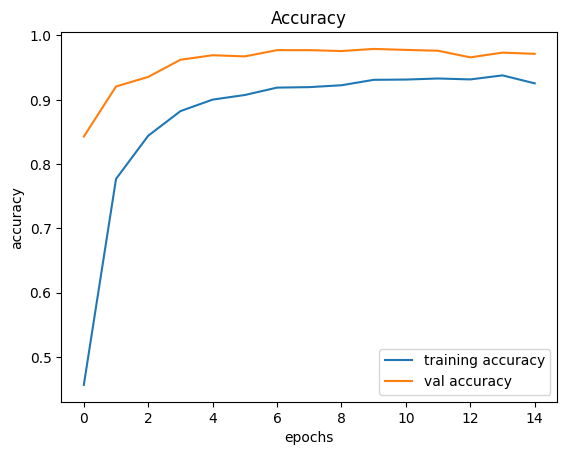

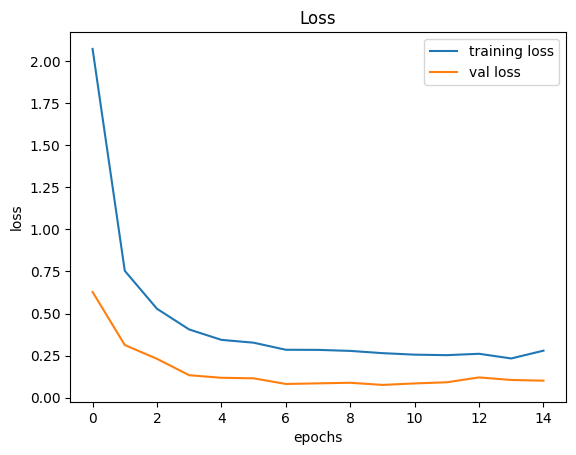

In [13]:
# Plotting performance graphs
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

7. Loading Test Dataset and Evaluating the Model

In [49]:
import os
from PIL import Image
import numpy as np

# Load CSV
y_test = pd.read_csv('/content/extracted_data/archive/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Correct the base path
base_path = '/content/extracted_data/archive/'

# Retrieve the images
for img in imgs:
    try:
        # Construct the full path
        img_path = os.path.join(base_path, img)
        image = Image.open(img_path)
        image = image.resize((30, 30))
        data.append(np.array(image))
    except FileNotFoundError:
        print(f"File not found: {img}")
    except Exception as e:
        print(f"Error loading {img}: {e}")

X_test = np.array(data)

# Predict and evaluate (assuming `model` is defined)
pred = np.argmax(model.predict(X_test), axis=-1)

# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


395/395 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step
0.9379255740300871


395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step
Accuracy: 0.9379255740300871


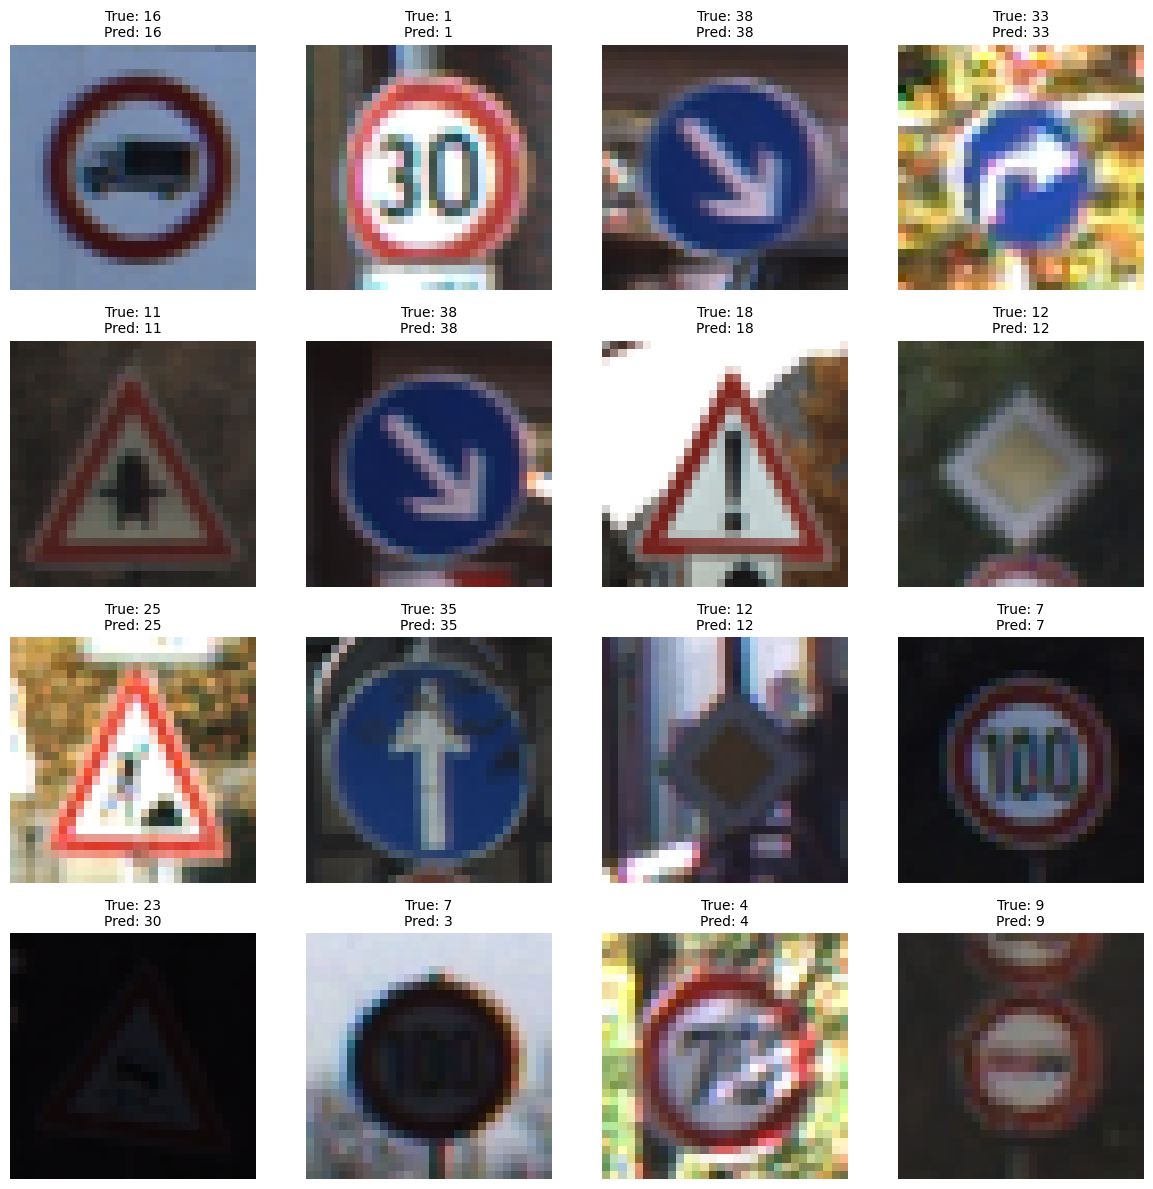

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv('/content/extracted_data/archive/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Retrieving the images
for img in imgs:
    image = Image.open('/content/extracted_data/archive/' + img)
    image = image.resize((30, 30))  # Resize to match model input size
    data.append(np.array(image))

X_test = np.array(data)

# Predicting using the model
pred = np.argmax(model.predict(X_test), axis=-1)

# Accuracy on the test dataset
print("Accuracy:", accuracy_score(labels, pred))

# Visualizing a few test images with their predictions
def visualize_predictions(images, true_labels, predictions, class_mapping=None):
    plt.figure(figsize=(12, 12))
    for i in range(16):  # Displaying 16 images
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        title = f"True: {true_labels[i]}\nPred: {predictions[i]}"
        if class_mapping:
            title = f"True: {class_mapping[true_labels[i]]}\nPred: {class_mapping[predictions[i]]}"
        plt.title(title, fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Assuming no class mapping, pass None for now
visualize_predictions(X_test, labels, pred)
